<a href="https://colab.research.google.com/github/HongYeongPyo/first-repository/blob/03SQL%2B04%EB%B9%84%EC%A0%95%EC%A0%9C/4%EB%B9%84%EC%A0%95%EC%A0%9C_2_1%ED%83%9D%EC%8B%9C%EC%9A%94%EA%B8%88e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pwd

/workspace/userdisk


In [ ]:
data = pd.read_csv('trip.csv')

In [ ]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
print(data.describe())

       passenger_count  trip_distance   fare_amount    tip_amount  \
count     22701.000000   22701.000000  22698.000000  22701.000000   
mean          1.643584       2.913400     13.024009      1.835745   
std           1.304942       3.653023     13.240074      2.800537   
min           0.000000       0.000000   -120.000000      0.000000   
25%           1.000000       0.990000      6.500000      0.000000   
50%           1.000000       1.610000      9.500000      1.350000   
75%           2.000000       3.060000     14.500000      2.450000   
max          36.000000      33.960000    999.990000    200.000000   

       tolls_amount  
count  22701.000000  
mean       0.312514  
std        1.399153  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       19.100000  


In [ ]:
# 1. 중복된 행 찾기 (전체 열 기준)
duplicates = data[data.duplicated(keep=False)]

# 2. 중복된 승객 이름 목록 추출
duplicated_names = duplicates['passenger_name'].unique()

# 3. 중복된 승객명이 하나라도 있다면, 그 중 하나를 출력
if len(duplicated_names) > 0:
    passenger_name = duplicated_names[0]  # 첫 번째 중복 승객명 선택
    print(f"# 중복 승객명: {passenger_name}")

    # 4. 중복 승객의 전체 행 출력
    print(data[data['passenger_name'] == passenger_name])
else:
    print("중복된 승객명이 없습니다.")

# 중복 승객명: Sarah Gross
   passenger_name   tpep_pickup_datetime  tpep_dropoff_datetime  \
16    Sarah Gross  08/15/2017 7:48:08 PM  08/15/2017 8:00:37 PM   
17    Sarah Gross  08/15/2017 7:48:08 PM  08/15/2017 8:00:37 PM   

   payment_method  passenger_count  trip_distance  fare_amount  tip_amount  \
16           Cash                1            3.6         12.5        2.85   
17           Cash                1            3.6         12.5        2.85   

    tolls_amount  
16           0.0  
17           0.0  


In [ ]:
# 5. 중복 데이터 제거 (전체 열 기준 중복 제거)
data_deduplicated = data.drop_duplicates(keep='first')  # 또는 keep='last', keep=False

# 결과 출력
print("\n✅ 중복 제거 후 데이터:")
print(data_deduplicated)

# 행 수 비교 (전후 변화 확인)
print(f"\n총 행 수 (제거 전): {len(data)}")
print(f"총 행 수 (제거 후): {len(data_deduplicated)}")


✅ 중복 제거 후 데이터:
          passenger_name    tpep_pickup_datetime   tpep_dropoff_datetime  \
0           Pamela Duffy   03/25/2017 8:55:43 AM   03/25/2017 9:09:47 AM   
1        Michelle Foster   04/11/2017 2:53:28 PM   04/11/2017 3:19:58 PM   
2             Tina Combs   12/15/2017 7:26:56 AM   12/15/2017 7:34:08 AM   
3            Anthony Ray   05/07/2017 1:17:59 PM   05/07/2017 1:48:14 PM   
4        Brianna Johnson  04/15/2017 11:32:20 PM  04/15/2017 11:49:03 PM   
...                  ...                     ...                     ...   
22696     Austin Johnson   02/24/2017 5:37:23 PM   02/24/2017 5:40:39 PM   
22697   Monique Williams   08/06/2017 4:43:59 PM   08/06/2017 5:24:47 PM   
22698        Drew Graves   09/04/2017 2:54:14 PM   09/04/2017 2:58:22 PM   
22699  Jonathan Copeland  07/15/2017 12:56:30 PM   07/15/2017 1:08:26 PM   
22700    Benjamin Miller   03/02/2017 1:02:49 PM   03/02/2017 1:16:09 PM   

      payment_method  passenger_count  trip_distance  fare_amount  tip_

In [ ]:
data_deduplicated

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [ ]:
## ==== 결측치 확인

In [ ]:
data_deduplicated.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [ ]:
# Q. 전체 데이터 대비 결측치의 비율을 확인합니다.

# [[YOUR CODE]]

#import pandas as pd

# 예시: 데이터 불러오기
#data = pd.read_csv('data.csv')  # 파일 경로에 맞게 조정

# 1. 전체 데이터 수 (행 수 기준)
total_rows = len(data)

# 2. 컬럼별 결측치 수
missing_count = data.isnull().sum()

# 3. 결측치 비율 계산 (% 또는 소수)
missing_ratio = (missing_count / total_rows) * 100

# 4. 결과 정리 (비율을 소수점 2자리로 정리)
missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Ratio (%)': missing_ratio.round(2)
})

# 5. 출력
print(missing_df)


                       Missing Count  Missing Ratio (%)
passenger_name                     0               0.00
tpep_pickup_datetime               0               0.00
tpep_dropoff_datetime              0               0.00
payment_method                     0               0.00
passenger_count                    0               0.00
trip_distance                      0               0.00
fare_amount                        3               0.01
tip_amount                         0               0.00
tolls_amount                       0               0.00


In [ ]:
# Q. 결측치를 제거합니다.

# [[YOUR CODE]]

# 결측치가 포함된 모든 행 제거
data_cleaned = data.dropna()

# 결과 확인
print(data_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22698 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22698 non-null  object 
 1   tpep_pickup_datetime   22698 non-null  object 
 2   tpep_dropoff_datetime  22698 non-null  object 
 3   payment_method         22698 non-null  object 
 4   passenger_count        22698 non-null  int64  
 5   trip_distance          22698 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22698 non-null  float64
 8   tolls_amount           22698 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.7+ MB
None


In [ ]:
#data.isna().mean()

data_cleaned.isna().mean()

passenger_name           0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
payment_method           0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
tip_amount               0.0
tolls_amount             0.0
dtype: float64

In [ ]:
#=====passenger_count 컬럼의 이상치 제거

In [ ]:
#==== 이상치 제거 전후(전체)========
# 1. IQR 계산
Q1 = data['passenger_count'].quantile(0.25)
Q3 = data['passenger_count'].quantile(0.75)
IQR = Q3 - Q1

# 2. 이상치 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. 이상치가 아닌 값만 필터링
data_cleaned = data[(data['passenger_count'] >= lower_bound) & (data['passenger_count'] <= upper_bound)]

# 4. 결과 확인
print(f"제거 전 행 수: {len(data)}")
print(f"제거 후 행 수: {len(data_cleaned)}")
print(f"제거된 이상치 수: {len(data) - len(data_cleaned)}")

제거 전 행 수: 22701
제거 후 행 수: 20410
제거된 이상치 수: 2291


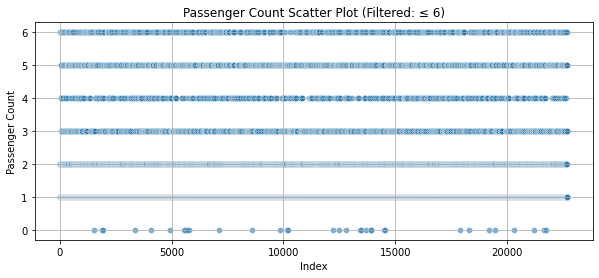

In [ ]:
# passenger_count 값의 scatter plot을 그립니다.

#sns.scatterplot(x = data.index, y = data['passenger_count'])



#=============
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 이상치 제거 (예: passenger_count > 6 제거)
filtered_data = data[data['passenger_count'] <= 6]

# 2. scatter plot 그리기
plt.figure(figsize=(10, 4))
sns.scatterplot(x=filtered_data.index, y=filtered_data['passenger_count'], alpha=0.6)

# 3. 그래프 레이블 및 제목
plt.title('Passenger Count Scatter Plot (Filtered: ≤ 6)')
plt.xlabel('Index')
plt.ylabel('Passenger Count')
plt.grid(True)
plt.show()


In [ ]:
# passenger_count 컬럼의 이상치를 제거합니다.
# (passenger_count가 6을 초과하는 경우)

# passenger_count가 6 이하인 데이터만 남기기
data_cleaned = data[data['passenger_count'] <= 6]

# 결과 확인
print(f"제거 전 데이터 수: {len(data)}")
print(f"제거 후 데이터 수: {len(data_cleaned)}")
print(f"제거된 이상치 수: {len(data) - len(data_cleaned)}")

제거 전 데이터 수: 22701
제거 후 데이터 수: 22700
제거된 이상치 수: 1


In [ ]:
# passenger_count 컬럼의 이상치를 확인합니다.
# (passenger_count가 0인 경우)

#data_len = data[data['passenger_count'] == 0]
#print(data_len)


#==========
# passenger_count가 0인 이상치 확인
zero_passengers = data[data['passenger_count'] == 0]

# # 결과 출력
print("🚨 passenger_count가 0인 이상치 데이터:")
print(zero_passengers)
print(zero_passengers.head(10))    #결과를 10건만 출력


# # 건수 출력
print(f"\n총 {len(zero_passengers)}건의 passenger_count = 0인 데이터가 발견되었습니다.")

🚨 passenger_count가 0인 이상치 데이터:
           passenger_name    tpep_pickup_datetime   tpep_dropoff_datetime  \
1518     Sophia Hernandez   11/14/2017 3:45:23 PM   11/14/2017 4:26:38 PM   
1876         Tommy Weaver  12/03/2017 12:05:52 PM  12/03/2017 12:13:51 PM   
1927     Melissa Thompson   09/09/2017 3:44:45 AM   09/09/2017 3:49:19 AM   
3354          Lisa Wilson  12/18/2017 10:44:57 PM  12/18/2017 11:00:24 PM   
4062    Benjamin Anderson   11/27/2017 1:08:01 PM   11/27/2017 1:17:55 PM   
4921     Austin Gutierrez   12/16/2017 2:59:17 PM   12/16/2017 3:21:59 PM   
5565      Charles Stewart   09/04/2017 5:40:00 PM   09/04/2017 5:51:52 PM   
5605       Kristina Smith  12/17/2017 12:18:49 PM  12/17/2017 12:40:45 PM   
5670           Susan Cook   12/16/2017 7:50:12 PM   12/16/2017 8:00:30 PM   
5769        Rebecca Curry   10/04/2017 3:17:52 PM   10/04/2017 3:56:26 PM   
7104     Latasha Campbell   12/29/2017 1:41:17 PM   12/29/2017 1:55:57 PM   
8597        Jennifer Park  11/14/2017 12:06:0

In [ ]:
# passenger_count 컬럼의 이상치를 제거합니다.

data = data[data['passenger_count'] != 0]
print(data)

          passenger_name    tpep_pickup_datetime   tpep_dropoff_datetime  \
0           Pamela Duffy   03/25/2017 8:55:43 AM   03/25/2017 9:09:47 AM   
1        Michelle Foster   04/11/2017 2:53:28 PM   04/11/2017 3:19:58 PM   
2             Tina Combs   12/15/2017 7:26:56 AM   12/15/2017 7:34:08 AM   
3            Anthony Ray   05/07/2017 1:17:59 PM   05/07/2017 1:48:14 PM   
4        Brianna Johnson  04/15/2017 11:32:20 PM  04/15/2017 11:49:03 PM   
...                  ...                     ...                     ...   
22696     Austin Johnson   02/24/2017 5:37:23 PM   02/24/2017 5:40:39 PM   
22697   Monique Williams   08/06/2017 4:43:59 PM   08/06/2017 5:24:47 PM   
22698        Drew Graves   09/04/2017 2:54:14 PM   09/04/2017 2:58:22 PM   
22699  Jonathan Copeland  07/15/2017 12:56:30 PM   07/15/2017 1:08:26 PM   
22700    Benjamin Miller   03/02/2017 1:02:49 PM   03/02/2017 1:16:09 PM   

      payment_method  passenger_count  trip_distance  fare_amount  tip_amount  \
0     

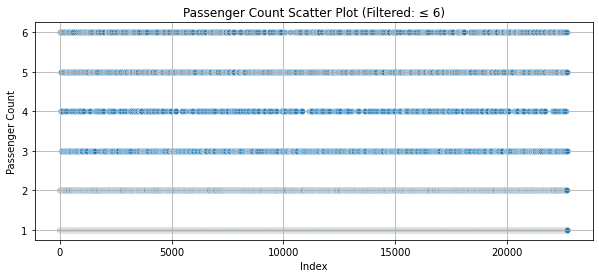

In [ ]:
# passenger_count의 scatter plot을 다시 그려봅니다.

#sns.scatterplot(x = data.index, y = data['passenger_count'])


#==========
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 이상치 제거 (예: passenger_count > 6 제거)
filtered_data = data[data['passenger_count'] <= 6]

# 2. scatter plot 그리기
plt.figure(figsize=(10, 4))
sns.scatterplot(x=filtered_data.index, y=filtered_data['passenger_count'], alpha=0.6)

# 3. 그래프 레이블 및 제목
plt.title('Passenger Count Scatter Plot (Filtered: ≤ 6)')
plt.xlabel('Index')
plt.ylabel('Passenger Count')
plt.grid(True)
plt.show()


In [ ]:
# == 수치형 컬럼의 이상치 제거

🚨 trip_distance 이상치:
           passenger_name    tpep_pickup_datetime   tpep_dropoff_datetime  \
6            Tonya Moreno   05/03/2017 7:04:09 PM   05/03/2017 8:03:47 PM   
11            Jamie Brown   03/05/2017 7:15:30 PM   03/05/2017 7:52:18 PM   
22  Jacqueline Mclean DVM  10/11/2017 12:34:49 PM   10/11/2017 1:22:38 PM   
30           David Burton   11/06/2017 8:30:50 PM  11/07/2017 12:00:00 AM   
33             Amy Larsen  07/26/2017 11:26:50 PM  07/26/2017 11:55:49 PM   

   payment_method  passenger_count  trip_distance  fare_amount  tip_amount  \
6            Cash                1          12.83        47.50        9.86   
11     Debit Card                2          18.90        52.00       14.58   
22     Debit Card                1          12.30        68.25       12.00   
30    Credit Card                1          30.83        80.00       18.56   
33           Cash                1          14.32        40.50        0.00   

    tolls_amount  
6           0.00  
11       

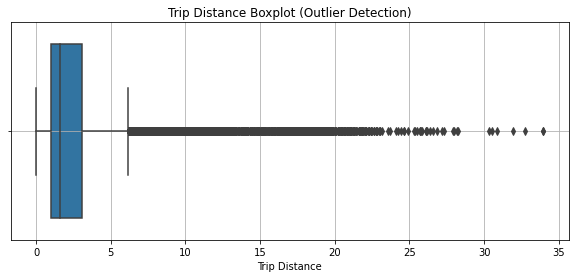

In [ ]:
# Q. trip_distance의 이상치를 확인합니다.

# [[YOUR CODE]]

#=  방법 1: IQR (Interquartile Range) 기준으로 이상치 확인===
# 1. 사분위수 계산
Q1 = data['trip_distance'].quantile(0.25)
Q3 = data['trip_distance'].quantile(0.75)
IQR = Q3 - Q1

# 2. 이상치 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. 이상치 확인 (경계 밖에 있는 값들)
outliers = data[(data['trip_distance'] < lower_bound) | (data['trip_distance'] > upper_bound)]

# 4. 출력
print("🚨 trip_distance 이상치:")
print(outliers.head())  # 이상치 중 상위 5개만 출력
print(f"\n총 이상치 수: {len(outliers)}건")


print("=================")

# = 방법 2: 시각적으로 이상치 확인 (Boxplot)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.boxplot(x=data['trip_distance'])
plt.title("Trip Distance Boxplot (Outlier Detection)")
plt.xlabel("Trip Distance")
plt.grid(True)
plt.show()

In [ ]:
# Q. trip_distance의 이상치를 제거합니다.

# [[YOUR CODE]]



# IQR 기준 이상치 제거]

# 1. 사분위수 계산
Q1 = data['trip_distance'].quantile(0.25)
Q3 = data['trip_distance'].quantile(0.75)
IQR = Q3 - Q1

# 2. 이상치 경계값 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. 이상치를 제외한 데이터 필터링
data_cleaned = data[(data['trip_distance'] >= lower_bound) & (data['trip_distance'] <= upper_bound)]

# 4. 결과 출력
print(f"제거 전 데이터 수: {len(data)}")
print(f"제거 후 데이터 수: {len(data_cleaned)}")
print(f"제거된 이상치 수: {len(data) - len(data_cleaned)}")

제거 전 데이터 수: 22668
제거 후 데이터 수: 20152
제거된 이상치 수: 2516


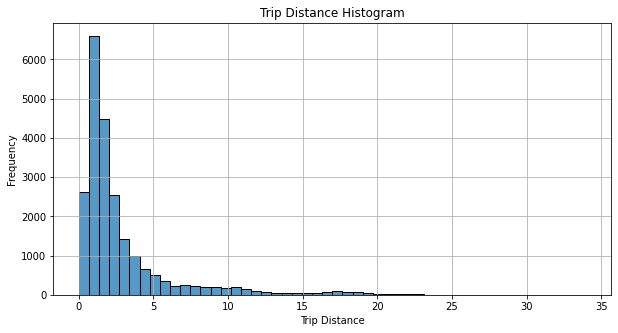

In [ ]:
# Q. trip_distance의 히스토그램을 그립니다.

# [[YOUR CODE]]


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(data['trip_distance'], bins=50, kde=False)

plt.title('Trip Distance Histogram')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22668.000000,22668.000000,22665.000000,22668.000000,22668.000000
mean,1.645977,2.913958,13.022359,1.835308,0.312461
std,1.304383,3.654503,13.240023,2.801648,1.399188
min,1.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.070000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


🚨 fare_amount가 0 이하인 이상치 개수: 20
              passenger_name    tpep_pickup_datetime   tpep_dropoff_datetime  \
316          Tiffany Johnson   12/13/2017 2:02:39 AM   12/13/2017 2:03:08 AM   
1648           Debbie Holmes  07/05/2017 11:02:23 AM  07/05/2017 11:03:00 AM   
4404  Mrs. Tiffany Brown DDS   12/20/2017 4:06:53 PM   12/20/2017 4:47:50 PM   
4425            Bobby Wilson   11/16/2017 8:13:30 PM   11/16/2017 8:14:50 PM   
5450      Alejandro Williams  04/06/2017 12:50:26 PM  04/06/2017 12:52:39 PM   

     payment_method  passenger_count  trip_distance  fare_amount  tip_amount  \
316            Cash                6           0.12         -2.5         0.0   
1648    Credit Card                1           0.04         -2.5         0.0   
4404           Cash                1           7.06          0.0         0.0   
4425           Cash                2           0.06         -3.0         0.0   
5450     Debit Card                1           0.25         -3.5         0.0   

      

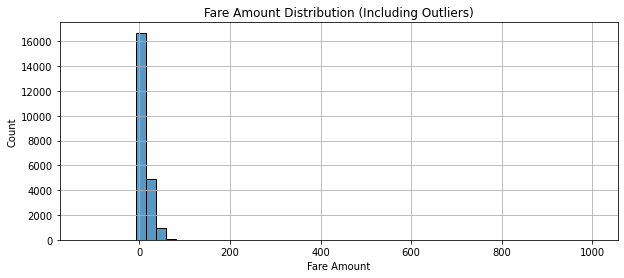

In [ ]:
# Q. fare_amount의 이상치 데이터 개수를 확인합니다.
# (fare_amount가 0 이하인 경우)

# [[YOUR CODE]]

# 0 이하인 이상치 조건 필터링
fare_outliers = data[data['fare_amount'] <= 0]

# 이상치 개수 출력
print(f"🚨 fare_amount가 0 이하인 이상치 개수: {len(fare_outliers)}")


print(fare_outliers.head())


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.histplot(data['fare_amount'], bins=50)
plt.title('Fare Amount Distribution (Including Outliers)')
plt.xlabel('Fare Amount')
plt.grid(True)
plt.show()

In [ ]:
# Q. fare_amount의 이상치를 제거합니다.

# [[YOUR CODE]]

# 0 이하인 이상치 제거
data_cleaned = data[data['fare_amount'] > 0]

# 결과 확인
print(f"제거 전 데이터 수: {len(data)}")
print(f"제거 후 데이터 수: {len(data_cleaned)}")
print(f"제거된 이상치 수: {len(data) - len(data_cleaned)}")

제거 전 데이터 수: 22668
제거 후 데이터 수: 22645
제거된 이상치 수: 23


In [ ]:
data.sort_values('fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
12946,Patrick Herring,04/08/2017 12:00:16 AM,04/08/2017 11:15:57 PM,Cash,1,0.17,-120.00,0.0,0.00
20700,Nicole Pierce,02/24/2017 12:38:17 AM,02/24/2017 12:42:05 AM,Cash,1,0.70,-4.50,0.0,0.00
11206,Austin Fields,07/09/2017 7:20:59 AM,07/09/2017 7:23:50 AM,Debit Card,1,0.64,-4.50,0.0,0.00
17604,Tyler Lowe,03/24/2017 7:31:13 PM,03/24/2017 7:34:49 PM,Cash,1,0.46,-4.00,0.0,0.00
14716,Stefanie Warner,12/24/2017 10:37:58 PM,12/24/2017 10:41:08 PM,Debit Card,5,0.40,-4.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...
20314,Nicholas Thomas,12/19/2017 9:40:46 AM,12/19/2017 9:40:55 AM,Cash,2,0.00,450.00,0.0,0.00
8478,Alexis Hanson,02/06/2017 5:50:10 AM,02/06/2017 5:51:08 AM,Credit Card,1,2.60,999.99,200.0,0.00
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00


In [ ]:
# Q. fare_amount의 이상치를 제거합니다.

# [[YOUR CODE]]

# 이상치 제거: fare_amount가 0보다 큰 값만 남김
data_cleaned = data[data['fare_amount'] > 0]

# 결과 확인
print(f"제거 전 데이터 수: {len(data)}")
print(f"제거 후 데이터 수: {len(data_cleaned)}")
print(f"제거된 이상치 수: {len(data) - len(data_cleaned)}")

제거 전 데이터 수: 22668
제거 후 데이터 수: 22645
제거된 이상치 수: 23


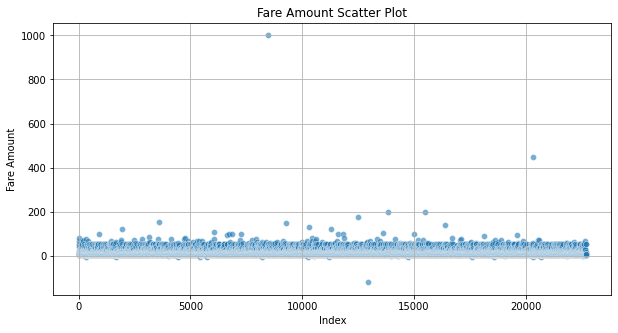

In [ ]:
# Q. fare_amount의 scatter plot을 그립니다.

# [[YOUR CODE]]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.scatterplot(x=data.index, y=data['fare_amount'], alpha=0.6)

plt.title('Fare Amount Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()


In [ ]:
# fare_amount가 150을 초과한다면 150으로 변환합니다.

def fare_func(x):
    if x > 150:
        return 150
    else:
        return x



#===========
# 150 초과 값은 150으로, 그 외는 원래 값 유지
data_amount = data['fare_amount'].apply(lambda x: 150 if x > 150 else x)
data_amount

0        13.0
1        16.0
2         6.5
3        20.5
4        16.5
         ... 
22696     4.0
22697    52.0
22698     4.5
22699    10.5
22700    11.0
Name: fare_amount, Length: 22668, dtype: float64

In [ ]:
data['fare_amount'].apply(fare_func)

0        13.0
1        16.0
2         6.5
3        20.5
4        16.5
         ... 
22696     4.0
22697    52.0
22698     4.5
22699    10.5
22700    11.0
Name: fare_amount, Length: 22668, dtype: float64

In [ ]:
data.sort_values('fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
12946,Patrick Herring,04/08/2017 12:00:16 AM,04/08/2017 11:15:57 PM,Cash,1,0.17,-120.0,0.0,0.00
20700,Nicole Pierce,02/24/2017 12:38:17 AM,02/24/2017 12:42:05 AM,Cash,1,0.70,-4.5,0.0,0.00
11206,Austin Fields,07/09/2017 7:20:59 AM,07/09/2017 7:23:50 AM,Debit Card,1,0.64,-4.5,0.0,0.00
17604,Tyler Lowe,03/24/2017 7:31:13 PM,03/24/2017 7:34:49 PM,Cash,1,0.46,-4.0,0.0,0.00
14716,Stefanie Warner,12/24/2017 10:37:58 PM,12/24/2017 10:41:08 PM,Debit Card,5,0.40,-4.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...
3584,Matthew Chavez,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,Credit Card,1,7.30,150.0,0.0,0.00
8478,Alexis Hanson,02/06/2017 5:50:10 AM,02/06/2017 5:51:08 AM,Credit Card,1,2.60,150.0,200.0,0.00
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00


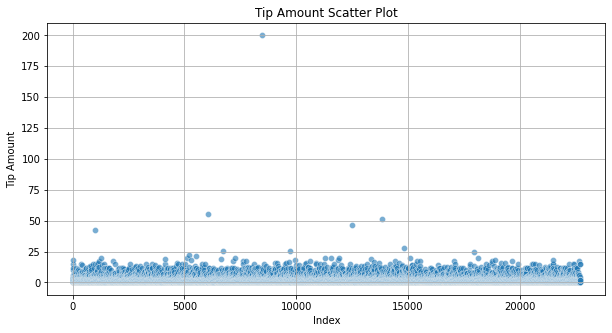

In [ ]:
# Q. tip_amount의 scatter plot을 그립니다.

# [[YOUR CODE]]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.scatterplot(x=data.index, y=data['tip_amount'], alpha=0.6)

plt.title('Tip Amount Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Tip Amount')
plt.grid(True)
plt.show()

In [ ]:
# Q. tip_amount의 이상치를 확인합니다.

# [[YOUR CODE]]

# 1. 사분위수 계산
Q1 = data['tip_amount'].quantile(0.25)
Q3 = data['tip_amount'].quantile(0.75)
IQR = Q3 - Q1

# 2. 이상치 경계값 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. 이상치 데이터 추출
tip_outliers = data[(data['tip_amount'] < lower_bound) | (data['tip_amount'] > upper_bound)]

# 4. 결과 출력
print("🚨 tip_amount 이상치 데이터:")
print(tip_outliers.head())  # 이상치 중 상위 5개만 출력
print(f"\n총 이상치 수: {len(tip_outliers)}건")


🚨 tip_amount 이상치 데이터:
           passenger_name    tpep_pickup_datetime   tpep_dropoff_datetime  \
3             Anthony Ray   05/07/2017 1:17:59 PM   05/07/2017 1:48:14 PM   
6            Tonya Moreno   05/03/2017 7:04:09 PM   05/03/2017 8:03:47 PM   
11            Jamie Brown   03/05/2017 7:15:30 PM   03/05/2017 7:52:18 PM   
22  Jacqueline Mclean DVM  10/11/2017 12:34:49 PM   10/11/2017 1:22:38 PM   
30           David Burton   11/06/2017 8:30:50 PM  11/07/2017 12:00:00 AM   

   payment_method  passenger_count  trip_distance  fare_amount  tip_amount  \
3            Cash                1           3.70        20.50        6.39   
6            Cash                1          12.83        47.50        9.86   
11     Debit Card                2          18.90        52.00       14.58   
22     Debit Card                1          12.30        68.25       12.00   
30    Credit Card                1          30.83        80.00       18.56   

    tolls_amount  
3           0.00  
6       

In [ ]:
# Q. tip_amount의 이상치를 제거합니다.

# [[YOUR CODE]]

# 1. 사분위수 계산
Q1 = data['tip_amount'].quantile(0.25)
Q3 = data['tip_amount'].quantile(0.75)
IQR = Q3 - Q1

# 2. 이상치 경계 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. 이상치 제거 (정상 값만 남김)
data_cleaned = data[(data['tip_amount'] >= lower_bound) & (data['tip_amount'] <= upper_bound)]

# 4. 결과 확인
print(f"제거 전 데이터 수: {len(data)}")
print(f"제거 후 데이터 수: {len(data_cleaned)}")

제거 전 데이터 수: 22668
제거 후 데이터 수: 21483


In [ ]:
len(data)

22668

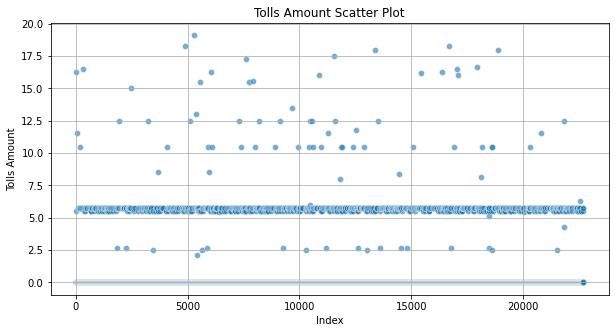

In [ ]:
# Q. tolls_amount의 scatter plot을 그립니다.

# [[YOUR CODE]]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.scatterplot(x=data.index, y=data['tolls_amount'], alpha=0.6)

plt.title('Tolls Amount Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Tolls Amount')
plt.grid(True)
plt.show()

In [ ]:
data.head(30)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.00,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.00,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.50,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.50,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.50,0.00,0.00
5,Justin Smith,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,Debit Card,6,2.30,9.00,2.06,0.00
6,Tonya Moreno,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,Cash,1,12.83,47.50,9.86,0.00
7,Hannah Foley,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,Debit Card,1,2.98,16.00,1.78,0.00
8,Katie Whitney,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,Cash,1,1.20,9.00,0.00,0.00
9,Amanda Jones,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,Cash,1,1.60,13.00,2.75,0.00


In [ ]:
# payment_method 컬럼에 어떤 값들이 있는지 살펴봅시다.

data['payment_method'].unique()

array(['Debit Card', 'Cash', 'Credit Card'], dtype=object)

In [ ]:
data['payment_method'].nunique()

3

In [ ]:
data['payment_method'].value_counts()

Cash           11181
Debit Card      5774
Credit Card     5713
Name: payment_method, dtype: int64

In [ ]:
#==승객명: 성과 이름을 분리하여 성 부분만 저장해봅니다.

In [ ]:
example = 'Susan Robinson'
example

'Susan Robinson'

In [ ]:
example.split()

['Susan', 'Robinson']

In [ ]:
# Q. passenger_name을 성과 이름으로 분리하여 성 부분만 passenger_first_name 컬럼으로 저장합니다.

# [[YOUR CODE]]


# 성과 이름을 공백 기준으로 분리하고, 성(first name)을 새로운 열에 저장
data['passenger_first_name'] = data['passenger_name'].str.split().str[0]

# 결과 확인 (앞 5개 행 출력)
print(data[['passenger_name', 'passenger_first_name']].head())

    passenger_name passenger_first_name
0     Pamela Duffy               Pamela
1  Michelle Foster             Michelle
2       Tina Combs                 Tina
3      Anthony Ray              Anthony
4  Brianna Johnson              Brianna


/tmp/ipykernel_249/2529143866.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['passenger_first_name'] = data['passenger_name'].str.split().str[0]


In [ ]:
#==택시 탑승, 하차 시간을 활용해봅시다.

In [ ]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Card,6,3.34,13.0,2.76,0.0,Pamela
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Card,1,1.80,16.0,4.00,0.0,Michelle
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Card,1,1.00,6.5,1.45,0.0,Tina
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0,Anthony
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Card,1,4.37,16.5,0.00,0.0,Brianna


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22668 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22668 non-null  object 
 1   tpep_pickup_datetime   22668 non-null  object 
 2   tpep_dropoff_datetime  22668 non-null  object 
 3   payment_method         22668 non-null  object 
 4   passenger_count        22668 non-null  int64  
 5   trip_distance          22668 non-null  float64
 6   fare_amount            22665 non-null  float64
 7   tip_amount             22668 non-null  float64
 8   tolls_amount           22668 non-null  float64
 9   passenger_first_name   22668 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.9+ MB


In [ ]:
# Q. tpep_pickup_datetime 컬럼의 object 자료형을 datetime으로 변환합니다.

# [[YOUR CODE]]

# 문자열 형식의 날짜 데이터를 datetime 형식으로 변환
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

# 결과 확인: 데이터 타입 확인
print(data.dtypes['tpep_pickup_datetime'])


#=============
print("======================= ")
# 컬럼명
column_name = 'tpep_pickup_datetime'

# 자료형을 datetime으로 변환
data[column_name] = pd.to_datetime(data[column_name])

# 변환된 컬럼 데이터 출력 (앞 5개 행)
print(data[[column_name]].head())


print("=============== ")
# 변환 전 자료형 확인
print("변환 전 자료형:", data['tpep_pickup_datetime'].dtype)

# datetime 형식으로 변환
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

# 변환 후 자료형 확인
print("변환 후 자료형:", data['tpep_pickup_datetime'].dtype)

# 변환된 데이터 일부 출력
print(data[['tpep_pickup_datetime']].head())


datetime64[ns]
  tpep_pickup_datetime
0  2017-03-25 08:55:43
1  2017-04-11 14:53:28
2  2017-12-15 07:26:56
3  2017-05-07 13:17:59
4  2017-04-15 23:32:20
변환 전 자료형: datetime64[ns]
변환 후 자료형: datetime64[ns]
  tpep_pickup_datetime
0  2017-03-25 08:55:43
1  2017-04-11 14:53:28
2  2017-12-15 07:26:56
3  2017-05-07 13:17:59
4  2017-04-15 23:32:20


/tmp/ipykernel_249/771020716.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
/tmp/ipykernel_249/771020716.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = pd.to_datetime(data[column_name])
/tmp/ipykernel_249/771020716.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [ ]:
# Q. tpep_dropoff_datetime 컬럼의 object 자료형을 datetime으로 변환합니다.

# [[YOUR CODE]]

# tpep_dropoff_datetime 컬럼을 datetime 자료형으로 변환
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

# 변환 확인 (자료형 출력)
print("변환 후 자료형:", data['tpep_dropoff_datetime'].dtype)

# 변환된 데이터 확인 (앞 5개 행 출력)
print(data[['tpep_dropoff_datetime']].head())

변환 후 자료형: datetime64[ns]
  tpep_dropoff_datetime
0   2017-03-25 09:09:47
1   2017-04-11 15:19:58
2   2017-12-15 07:34:08
3   2017-05-07 13:48:14
4   2017-04-15 23:49:03


/tmp/ipykernel_249/2186398690.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22668 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passenger_name         22668 non-null  object        
 1   tpep_pickup_datetime   22668 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22668 non-null  datetime64[ns]
 3   payment_method         22668 non-null  object        
 4   passenger_count        22668 non-null  int64         
 5   trip_distance          22668 non-null  float64       
 6   fare_amount            22665 non-null  float64       
 7   tip_amount             22668 non-null  float64       
 8   tolls_amount           22668 non-null  float64       
 9   passenger_first_name   22668 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(3)
memory usage: 1.9+ MB


In [ ]:
# Q. 하차 시각과 승차 시각의 차이를 travel_time 컬럼으로 저장합니다.

# [[YOUR CODE]]

# 소요 시간을 계산하여 travel_time 컬럼에 저장
data['travel_time'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']

# 결과 확인 (앞 5개 행)
print(data[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'travel_time']].head())

  tpep_pickup_datetime tpep_dropoff_datetime     travel_time
0  2017-03-25 08:55:43   2017-03-25 09:09:47 0 days 00:14:04
1  2017-04-11 14:53:28   2017-04-11 15:19:58 0 days 00:26:30
2  2017-12-15 07:26:56   2017-12-15 07:34:08 0 days 00:07:12
3  2017-05-07 13:17:59   2017-05-07 13:48:14 0 days 00:30:15
4  2017-04-15 23:32:20   2017-04-15 23:49:03 0 days 00:16:43


/tmp/ipykernel_249/3096966612.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['travel_time'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']


In [ ]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,Pamela,0 days 00:14:04
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,Michelle,0 days 00:26:30
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,Tina,0 days 00:07:12
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,Anthony,0 days 00:30:15
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,Brianna,0 days 00:16:43


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22668 entries, 0 to 22700
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   passenger_name         22668 non-null  object         
 1   tpep_pickup_datetime   22668 non-null  datetime64[ns] 
 2   tpep_dropoff_datetime  22668 non-null  datetime64[ns] 
 3   payment_method         22668 non-null  object         
 4   passenger_count        22668 non-null  int64          
 5   trip_distance          22668 non-null  float64        
 6   fare_amount            22665 non-null  float64        
 7   tip_amount             22668 non-null  float64        
 8   tolls_amount           22668 non-null  float64        
 9   passenger_first_name   22668 non-null  object         
 10  travel_time            22668 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(3), timedelta64[ns](1)
memory usage: 2.1+ MB


In [ ]:
# Q. travel_time 컬럼의 데이터를 초 단위로 변환합니다.

# [[YOUR CODE]]


# travel_time을 초(second) 단위로 변환하여 새로운 컬럼에 저장
data['travel_time_seconds'] = data['travel_time'].dt.total_seconds()

# 결과 확인 (앞 5개 행)
print(data[['travel_time', 'travel_time_seconds']].head())

      travel_time  travel_time_seconds
0 0 days 00:14:04                844.0
1 0 days 00:26:30               1590.0
2 0 days 00:07:12                432.0
3 0 days 00:30:15               1815.0
4 0 days 00:16:43               1003.0


/tmp/ipykernel_249/487883187.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['travel_time_seconds'] = data['travel_time'].dt.total_seconds()


In [ ]:
# 보너스 (feature engineering 맛보기)

In [ ]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time,travel_time_seconds
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,Pamela,0 days 00:14:04,844.0
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,Michelle,0 days 00:26:30,1590.0
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,Tina,0 days 00:07:12,432.0
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,Anthony,0 days 00:30:15,1815.0
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,Brianna,0 days 00:16:43,1003.0


In [ ]:
# Q. 승객이 지불한 총 요금을 total_amount 컬럼으로 저장합니다.

# [[YOUR CODE]]


# 세 항목을 더해 총 요금을 계산하여 total_amount 컬럼에 저장
data['total_amount'] = data['fare_amount'] + data['tip_amount'] + data['tolls_amount']

# 결과 확인 (앞 5개 행 출력)
print(data[['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']].head())

   fare_amount  tip_amount  tolls_amount  total_amount
0         13.0        2.76           0.0         15.76
1         16.0        4.00           0.0         20.00
2          6.5        1.45           0.0          7.95
3         20.5        6.39           0.0         26.89
4         16.5        0.00           0.0         16.50


/tmp/ipykernel_249/3263976598.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_amount'] = data['fare_amount'] + data['tip_amount'] + data['tolls_amount']


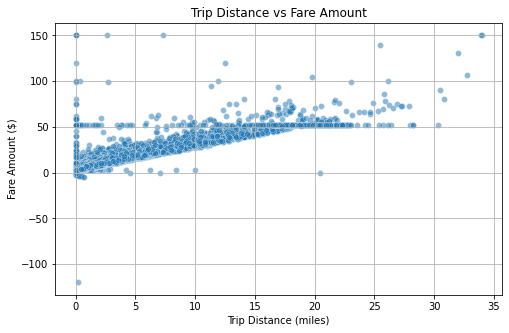

In [ ]:
# Q. fare_amount와 trip_distance 사이의 관계를 scatter plot으로 표현합니다.

# [[YOUR CODE]]


#Matplotlib을 사용하는 방법:
import matplotlib.pyplot as plt

# 산점도 그리기
# plt.figure(figsize=(8, 5))
# plt.scatter(data['trip_distance'], data['fare_amount'], alpha=0.5)
# plt.title('Trip Distance vs Fare Amount')
# plt.xlabel('Trip Distance (miles)')
# plt.ylabel('Fare Amount ($)')
# plt.grid(True)
# plt.show()


#Seaborn을 사용하는 방법 (선택):
import seaborn as sns
import matplotlib.pyplot as plt

# 산점도 그리기
plt.figure(figsize=(8, 5))
sns.scatterplot(x='trip_distance', y='fare_amount', data=data, alpha=0.5)
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()


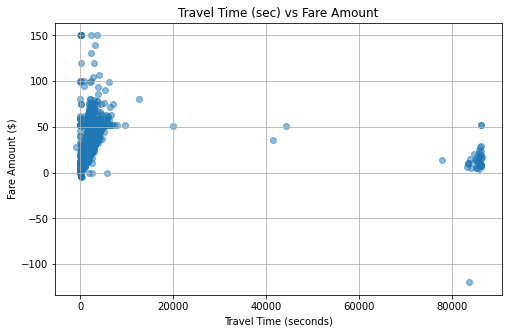

In [ ]:
# Q. fare_amount와 travel_time 사이의 관계를 scatter plot으로 표현합니다.

# [[YOUR CODE]]

import matplotlib.pyplot as plt

# 산점도 그리기
plt.figure(figsize=(8, 5))
plt.scatter(data['travel_time_seconds'], data['fare_amount'], alpha=0.5)
plt.title('Travel Time (sec) vs Fare Amount')
plt.xlabel('Travel Time (seconds)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

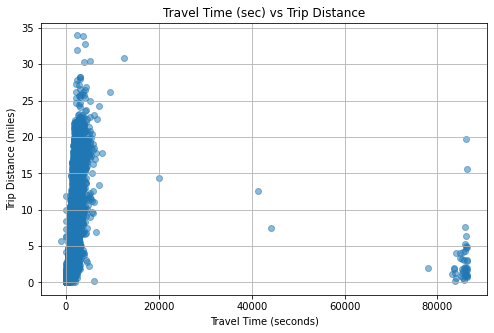

In [ ]:
# Q. trip_distance와 travel_time 사이의 관계를 scatter plot으로 표현합니다.

# [[YOUR CODE]]

import matplotlib.pyplot as plt

# 산점도 그리기 (trip_distance vs travel_time_seconds)
plt.figure(figsize=(8, 5))
plt.scatter(data['travel_time_seconds'], data['trip_distance'], alpha=0.5)
plt.title('Travel Time (sec) vs Trip Distance')
plt.xlabel('Travel Time (seconds)')
plt.ylabel('Trip Distance (miles)')
plt.grid(True)
plt.show()


In [ ]:
# Q. scatter plot으로 관찰된 travel_time의 이상치를 제거합니다.

# [[YOUR CODE]]

# 이상치 기준 설정: 1분 이상, 1시간 이하만 남김
filtered_data = data[(data['travel_time_seconds'] >= 60) & (data['travel_time_seconds'] <= 3600)]

# 결과 확인
print(filtered_data[['travel_time', 'travel_time_seconds']].describe())


                     travel_time  travel_time_seconds
count                      22224         22224.000000
mean   0 days 00:13:57.854841612           837.854842
std    0 days 00:10:10.281260800           610.281261
min              0 days 00:01:00            60.000000
25%              0 days 00:06:43           403.000000
50%              0 days 00:11:10           670.000000
75%              0 days 00:18:09          1089.000000
max              0 days 00:59:59          3599.000000
